# Workshop week 6


### Support Vector Machines (SVM)



A Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks. It belongs to the family of supervised learning algorithms and is particularly effective in high-dimensional spaces. SVMs are widely used in various fields, including image recognition, text classification, and bioinformatics.

Here are some key concepts associated with Support Vector Machines:

### Objective:
In a classification task, the primary goal of an SVM is to find a hyperplane that best separates the data points belonging to different classes. This hyperplane is chosen to maximize the margin between the classes, which is the distance between the hyperplane and the nearest data point of each class.

### Hyperplane:
In a two-dimensional space, a hyperplane is a simple line. However, in higher dimensions, it becomes a hyperplane. For example, in a three-dimensional space, it would be a plane, and in more dimensions, it would be a hyperplane.

### Support Vectors:
Support Vectors are the data points that lie closest to the decision boundary (hyperplane) and have the most significant influence on determining the optimal hyperplane. These are the critical elements in SVM as they define and support the decision boundary.

### Margin:
The margin is the gap between the decision boundary and the nearest data point from each class. A wider margin often corresponds to a more robust and generalized model, reducing the risk of overfitting.

### Kernel Trick:
SVMs can efficiently handle non-linear decision boundaries by employing the kernel trick. Kernels allow the algorithm to implicitly map the input space into a higher-dimensional space, making it possible to find a linear decision boundary in the transformed feature space.

### C Parameter:
The C parameter in SVM is a regularization term that balances the goal of achieving a wide margin and correctly classifying training data points. A smaller C allows a more robust margin but may misclassify some training data, while a larger C aims to classify all training data correctly, potentially leading to a narrower margin.

Support Vector Machines are known for their versatility, robustness, and effectiveness in various real-world applications. They excel in scenarios where the data is not linearly separable or has complex patterns. SVMs are a valuable tool in the machine learning toolkit for tasks ranging from text classification to image recognition and beyond.


The primal and dual formulations in Support Vector Machines (SVMs) are two ways of expressing the same optimization problem. The primal formulation directly seeks the optimal weights and bias for the hyperplane in the input space, while the dual formulation involves finding the weights of the support vectors using Lagrange multipliers. The dual formulation is advantageous in certain cases, especially when dealing with high-dimensional data or applying the kernel trick for non-linear classification. Both formulations lead to the same optimal solution, showcasing the duality relationship in SVMs. The choice between primal and dual depends on computational efficiency and the characteristics of the dataset.

In the primal form of SVM, we aim to minimize the objective function while subject to constraints. 

### The objective function is:

**Minimize (w, b):**
$$
\frac{1}{2} \|\mathbf{w}\|^2 
$$

This objective function represents the margin maximization problem. We want to find the values of $w$ and $b$ that minimize $\frac{1}{2} \|\mathbf{w}\|^2$ while satisfying the constraints.

Constraints:

The constraints ensure that data points are correctly classified and are on or beyond the margin boundary. For each training sample $(x_{i}, y_{i})$ where $x_{i}$ is the feature vector and $y_{i}$ is the class label, the following constraint is enforced:

$$y_{i}(w^Tx_{i} + b) ≥ 1 $$

This constraint ensures that data points are correctly classified by the hyperplane and are positioned beyond or on the margin.

**Lagrange Multipliers $(α_i)$:**

To solve the optimization problem, we use Lagrange multipliers $(α_i, \beta_i) $ for each constraint. The Langrangian function is defined as: 

$$ min_{w,  \xi, b} max_{α, \beta, w,  \xi_i, b} (L(w,b,α,\beta,\xi))= min_{w,  \xi, b}(\frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_i \xi_i) + max_{α, \beta, w,  \xi_i, b}( \sum_i \alpha_i \left(1 - \xi_i - y_i (\mathbf{w}^\top \mathbf{x}_i + b)\right) - \sum_i \beta_i \xi_i)$$


Equivalent form of the above equation used to find Lagrange multipliers analytically is


$$
max_{\alpha_i, \alpha_j}(\sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle)
$$

Subject to:
$$
0 \leq \alpha_i \leq C
$$
$$
\sum_i \alpha_i y_i = 0
$$


Where:

$α,\beta$ are vectors of Lagrange multipliers,one for each instance.

$m$ is the number of training samples.

$\xi$ are slack variables used for soft margin SVM
C is the hyperparameter determining how much slack should be given to training examples to optimise the cost function

The Lagrangian function combines the objective function with the constraints, weighted by the Lagrange multipliers.




You are tasked with building an SVM classifier to separate two classes (Class A and Class B) in a two-dimensional feature space. The data points in Class A are represented as $(x_1, x_2)$ and the data points in Class B are represented as $(y_1, y_2)$. Your goal is to find the optimal hyperplane that maximizes the margin between the two classes. 


### Task 1: Find SVM parameters using SVC

Use the code template for this task

1) Determine the parameters of the hyperplane.
2) Calculate the margin and identify the support vectors.
3) Change C parameter in SVC from small (e.g. 0.01) to large (e.g. 10) and observer how the support vectors and margin changes.
4) On a piece of paper, draw a diagram showing how the margin changes vs C value. Explain the plot. Is the plot linear? Why or why not?

Implement SVM classifier to classify given instances. Then find cupport vectors and margin. <br>
Use SVC documentation to find required APIs.


Support Vectors:
[[ 0.01542452 -1.27591872]
 [-1.64455111 -0.83846834]
 [-0.22621585  0.55199301]]
Margin:
1.7064566807672772
weights:
[[0.29866352 1.13332657]]
bias:
[0.44160859]


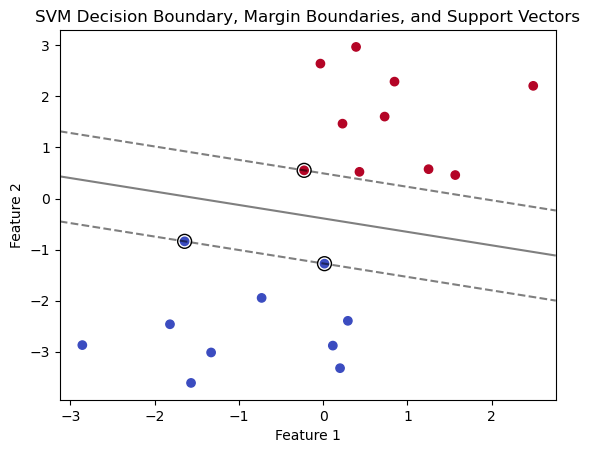

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate a small dataset
np.random.seed(41)  # For reproducibility

# 10 positive points around (2, 2)
class_a = np.random.randn(10, 2) + [1, 1.5]

# 10 negative points around (-2, -2)
class_b = np.random.randn(10, 2) + [-1, -1.5]

# Combine the data
X = np.vstack((class_a, class_b))
y = np.array([1] * 10 + [-1] * 10)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X, y)

# Access the support vectors and calculate the margin
support_vectors = svm_classifier.support_vectors_
margin = 2 / np.linalg.norm(svm_classifier.coef_)
weights = svm_classifier.coef_
bias = svm_classifier.intercept_

# Print the support vectors and margin
print("Support Vectors:")
print(support_vectors)

print("Margin:")
print(margin)

print("weights:")
print(weights)

print("bias:")
print(bias)


# Plot the decision boundary, margin boundaries, and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary, Margin Boundaries, and Support Vectors")
plt.show()


In this code, we used the coef_ attribute to access the weight vector w and the intercept attribute to access the bias b of the hyperplane. These values are determined by the SVM model based on the support vectors and Lagrange multipliers during training. Remembering that margin is $\frac{2}{||w||_2}$.


## Task 2: SVM classification using real dataset

1. Expand the following code by adding SVC classification. 
2. Calculate training accuracy of classification.
3. Choose approx C value (in range 0.0001-1.0) in SVC classifer that maximises the accuracy.
4. Explain why C lower than 1 improved classification accuracy.


In [2]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC

# get training dataset
train = "data1.csv"
df = pd.read_csv(train, header=None)
X_train = df[:500].iloc[:, 1:].to_numpy()
Y_train = df[:500].iloc[:, 0].replace(0, -1).to_numpy()

X_test = df[500:700].iloc[:, 1:].to_numpy()
Y_test = df[500:700].iloc[:, 0].replace(0, -1).to_numpy()

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=0.0001)
svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)

acc = np.mean(Y_test==Y_pred)

print(acc)


0.545


### Task 3: Optimisation with CVXPY

In SVMs, optimization is the process of determining the best parameters for a hyperplane that effectively separates different classes in a dataset. This involves minimizing a cost function to find the optimal weights and bias, with the objective of maximizing the margin between classes while satisfying certain constraints. Concurrently, kernels in SVMs allow these models to handle non-linear data by mapping it into a higher-dimensional space. Kernels, like the radial basis function (RBF) or polynomial kernels, play a pivotal role in shaping the decision boundary. The interplay between optimization and kernels is crucial—the choice of kernel impacts the optimization process, influencing the model's ability to capture intricate patterns in the data and determine the effectiveness of the SVM in handling diverse datasets. Efficient optimization methods become essential, particularly when incorporating kernels to navigate higher-dimensional feature spaces.


#### CVXPY example: fitting linear regression

In this example we fit linear regression, but put some constraints on W

 $$J( {\textbf{W}})=||\textbf{X}^T \textbf{W} -  \textbf{Y}||_2^2$$
 s. t. 
 $$0 \le W \le 1$$


Familiarise with the following example, payomg attention to a few important points:
* Declaration of variables in CVXPY
* Using various atomic functions to manipulate CVXPY variables
* The use of a threshold to ensure CVXPY proper values


In [10]:
import cvxpy as cp
import numpy as np

zero_threshold = 0.0001

# Problem data.
n = 30; m = 20
np.random.seed(1)
X = np.random.randn(m, n)
# b = np.random.rand() changed after the workshop to init with cp, to be consistent with Assignm2
Y = np.random.randn(m)
# Construct the problem.
W = cp.Variable(n)
b = cp.Variable()
objective = cp.Minimize(cp.sum_squares((X @ W + b) - Y))
constraints = [0 <= W, W <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()

# The optimal value for w is stored in `W.value`.
print(W.value)
W.value[np.isclose(W.value, 0, atol=zero_threshold)] = 0 
print(W.value)

# the minimised cost is in result
print(result)

[ 5.85724825e-01  1.99279605e-01 -1.67448146e-19  4.75687860e-01
 -4.58198292e-20  1.48942663e-20 -9.67932302e-20 -4.36327335e-20
  4.39975288e-01 -2.05874232e-20 -2.34011116e-19  6.10752580e-01
  1.76828510e-01  3.76857932e-01 -2.90630922e-20  1.82796895e-01
  2.02333664e-01  2.60431401e-01 -9.96666659e-20  2.20832913e-23
  1.30603643e-01  1.00000000e+00 -2.05086178e-20 -1.81560277e-19
  1.91283522e-01  4.59510149e-01  5.07712274e-20 -2.61781962e-20
  6.98349781e-20 -1.27135367e-19]
[0.58572483 0.19927961 0.         0.47568786 0.         0.
 0.         0.         0.43997529 0.         0.         0.61075258
 0.17682851 0.37685793 0.         0.1827969  0.20233366 0.2604314
 0.         0.         0.13060364 1.         0.         0.
 0.19128352 0.45951015 0.         0.         0.         0.        ]
8.279501870629032


Now apply this code to a larger dataset using the below template. 

Once the code is working, replace cp.sum_squares with other cp atomic functions. API reference can be found here: https://www.cvxpy.org/index.html


In [4]:
# import required libraries
import cvxpy as cp
import pandas as pd
import numpy as np

# get training dataset
train = "data.csv"
df = pd.read_csv(train, header=None)
X = df[:2000].iloc[:, 1:].to_numpy()
y = df[:2000].iloc[:, 0].replace(0, -1).to_numpy()

b = cp.Variable()

# Construct the problem.
W = cp.Variable(X.shape[1])

objective = cp.Minimize(cp.sum_squares((X @ W + b) - y))
objective = cp.Minimize(cp.sum(cp.square(cp.norm((cp.matmul(X, W) + b) - y))))
constraints = [0 <= W, W <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for w is stored in `W.value`.
W_val = W.value
b_val = b.value
print(np.sum(W_val), result)

# taking into account zero threshold
zero_threshold = 0.0001
W.value[np.isclose(W.value, 0, atol=zero_threshold)] = 0 
result = np.sum(((X @ W_val + b_val) - y)**2)

# the minimised cost is in result
print(np.sum(W_val),result)

1.9690430955681841 1882.7863861516114
1.9690000347664305 1882.7863997506859


### Task 4: CSV with kernel

In this task, you will compare SVM performance with and without kernel.

1. Use the code template to implement the model with and without RBF kernel.
2. Run the model and observe the decision boundary for each case. Explain differences.
3. Change C values around its current value C=1. Run the model, observe how decision boundary changes with C parameter.
4. Observe how the accuracy changes with and without the kernel, and with differnt values of C

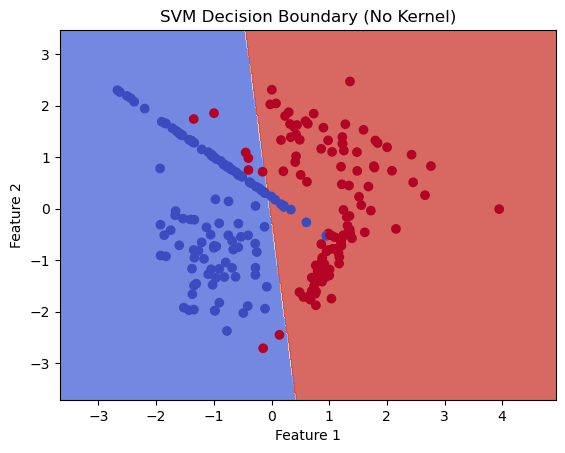

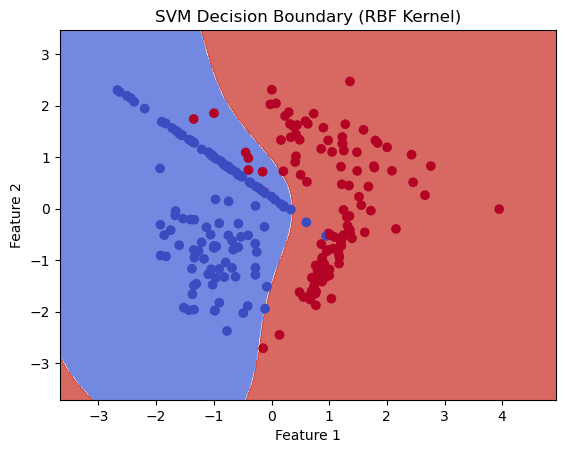

Accuracy on test data (No Kernel): 90.00%
Accuracy on test data (RBF Kernel): 95.00%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate synthetic data
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c = 0.1

# Create SVM model with no kernel (linear kernel)
svm_model_no_kernel = SVC(kernel='linear', C=c)
svm_model_no_kernel.fit(X_train, y_train)

# Create SVM model with RBF kernel
svm_model_rbf_kernel = SVC(kernel='rbf', gamma='scale', C=c)  # You can adjust the gamma parameter
svm_model_rbf_kernel.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundary on training data for no kernel
plot_decision_boundary(svm_model_no_kernel, X_train, y_train, 'SVM Decision Boundary (No Kernel)')

# Plot decision boundary on training data for RBF kernel
plot_decision_boundary(svm_model_rbf_kernel, X_train, y_train, 'SVM Decision Boundary (RBF Kernel)')

# Evaluate models on test data
accuracy_no_kernel = svm_model_no_kernel.score(X_test, y_test)
accuracy_rbf_kernel = svm_model_rbf_kernel.score(X_test, y_test)

print(f"Accuracy on test data (No Kernel): {accuracy_no_kernel * 100:.2f}%")
print(f"Accuracy on test data (RBF Kernel): {accuracy_rbf_kernel * 100:.2f}%")
